## Question 1: Clustering

##### Plan
- Make data ready for making clusters(Encoding, remove columns if needed)
- Make dendograms for deciding number of clusters
- Silhouette analysis on both datasets for getting number of clusters
- Use Agglomerative Clustering, K-means and K mediod cluster for data
- Show the 4 clusters for the algorithm that did the best
- Characterisation and conlusion of clusters

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
data_car = pd.read_csv("cardata.csv")
data_product = pd.read_excel("productdata.xls")

#data = data.drop(["Resp.Id"],axis=1)

In [107]:
code_numeric = {'yes': 1, 'no': 0}
data_product = data_product.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
data_product.head()

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan
0,1,3,1,0,1,1,0,0,0,0,1,0,0
1,2,6,0,2,0,0,1,0,1,0,0,1,0
2,3,4,1,1,0,0,0,0,0,1,1,0,1
3,4,4,0,2,1,1,0,0,0,0,1,0,0
4,5,3,1,0,1,1,0,0,0,0,1,0,1


In [108]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Dendogram and Silhouette analysis

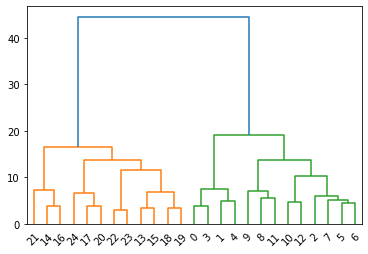

In [109]:
den = sch.dendrogram(sch.linkage(data_car,method='ward'))

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3979747111464383
For n_clusters = 3 The average silhouette_score is : 0.2759705764129952
For n_clusters = 4 The average silhouette_score is : 0.2993152243130742
For n_clusters = 5 The average silhouette_score is : 0.27679102946392065
For n_clusters = 6 The average silhouette_score is : 0.2853327945168534
For n_clusters = 7 The average silhouette_score is : 0.2965908384764349
For n_clusters = 8 The average silhouette_score is : 0.2989092447013141
For n_clusters = 9 The average silhouette_score is : 0.27983340672844
For n_clusters = 10 The average silhouette_score is : 0.24255814624779448


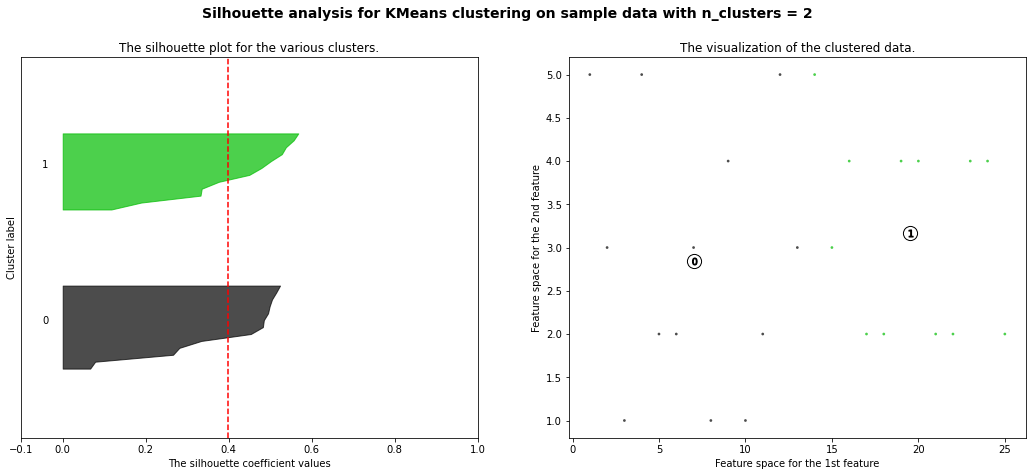

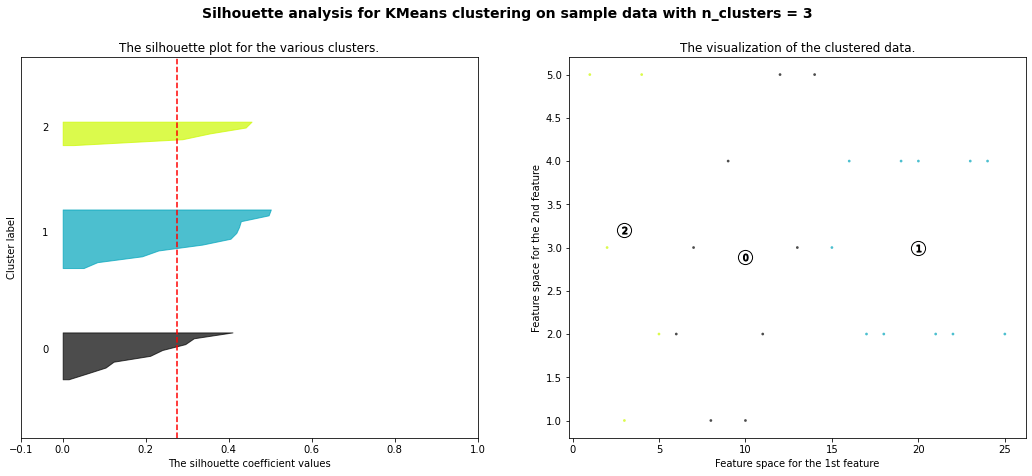

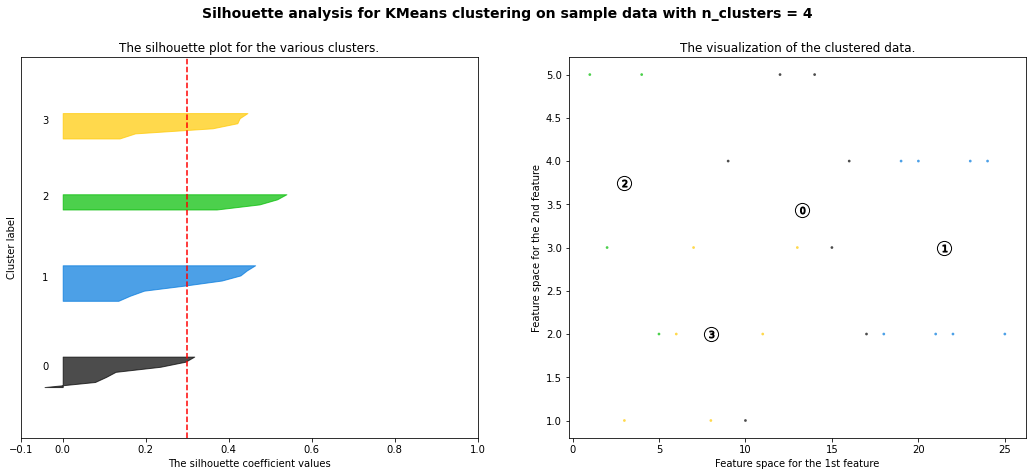

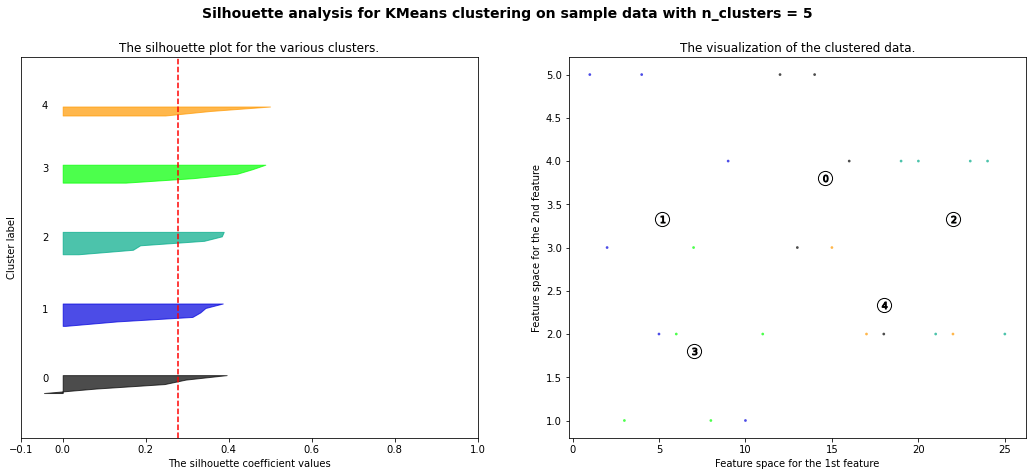

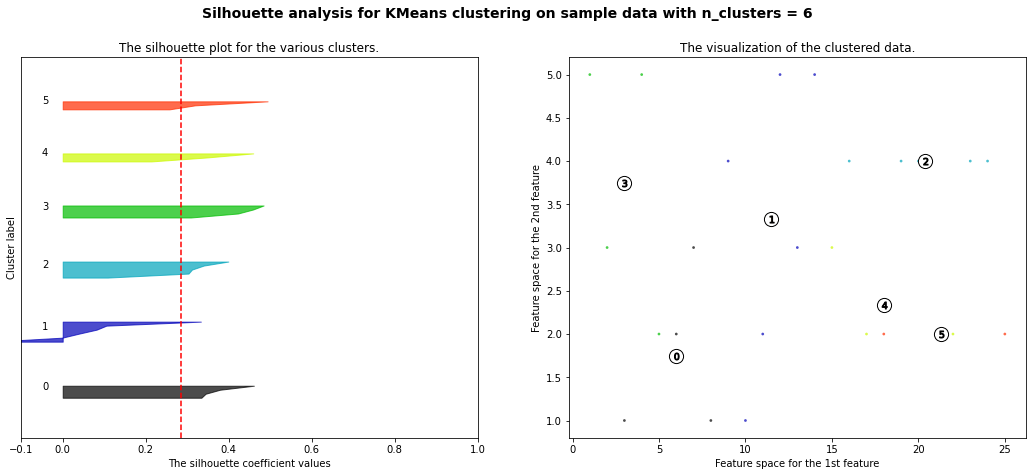

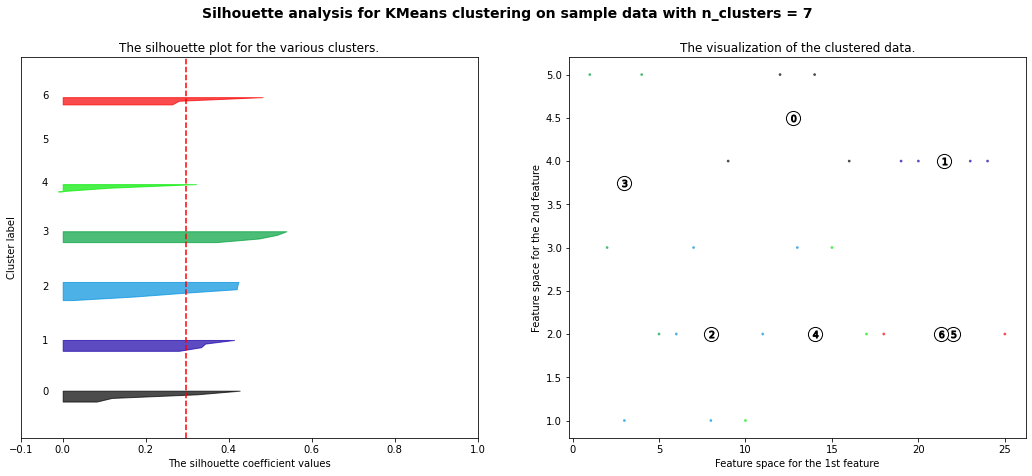

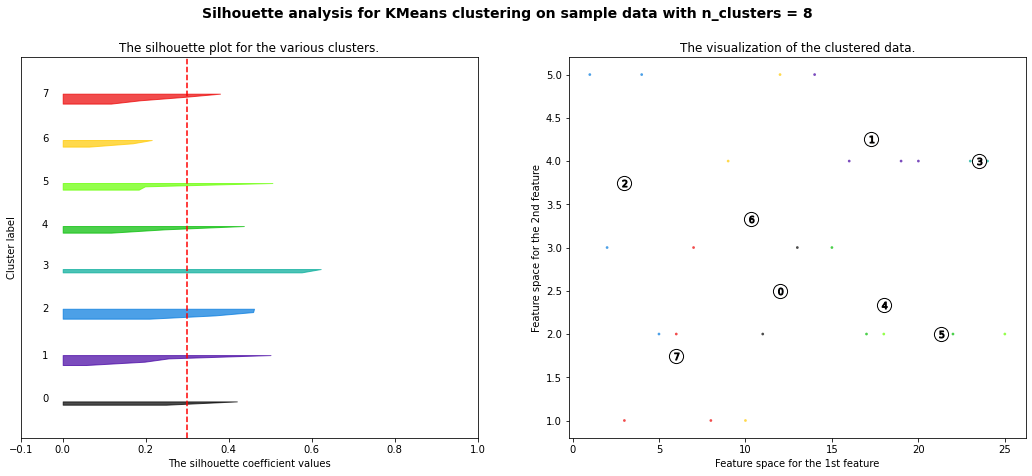

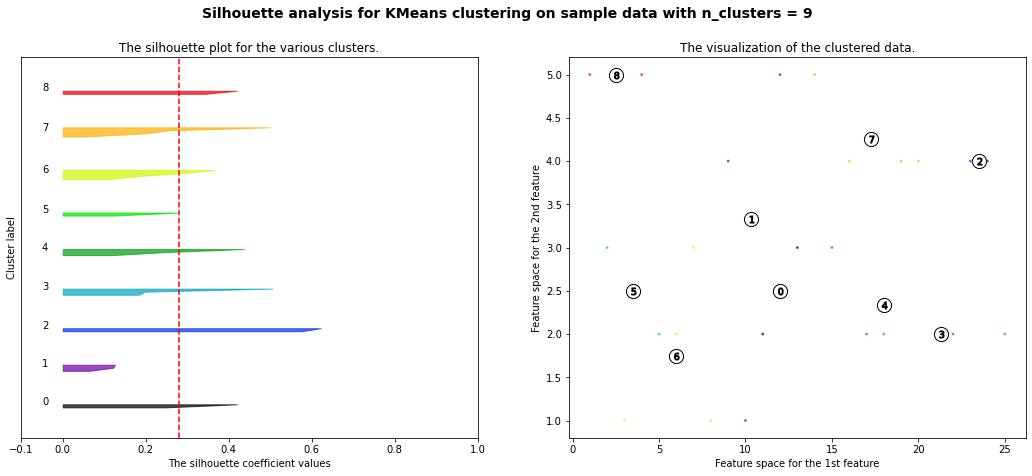

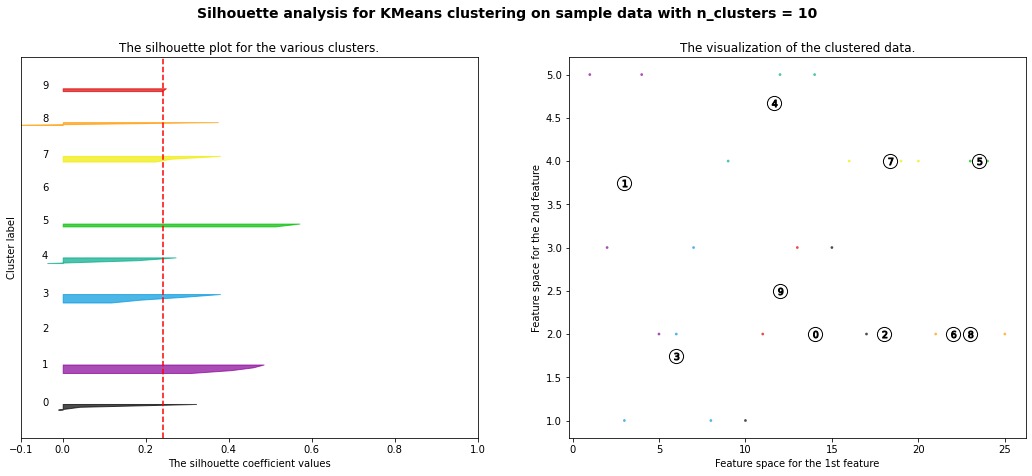

In [110]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
data = data_car.to_numpy()
X = data

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Conclusion: If we see the dendogram, we can see tht either we can make 2 clusters or 4 clusters and iby looking at the silhouette scores, the same thing is evident. But by selecting 2 clusters and testing it on dataset, I got a very non conclusive mixed results. Hence, for car data i would go with 4 clusters.

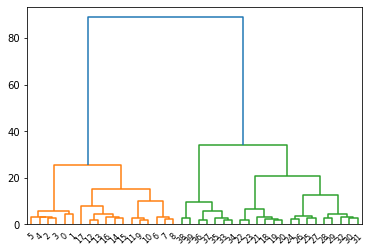

In [111]:
den1 = sch.dendrogram(sch.linkage(data_product,method='ward'))

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5627461281629375
For n_clusters = 3 The average silhouette_score is : 0.47959868973508846
For n_clusters = 4 The average silhouette_score is : 0.4303227146154603
For n_clusters = 5 The average silhouette_score is : 0.3918455559543779
For n_clusters = 6 The average silhouette_score is : 0.3804170280276816
For n_clusters = 7 The average silhouette_score is : 0.35589575099639637
For n_clusters = 8 The average silhouette_score is : 0.38404145542913193
For n_clusters = 9 The average silhouette_score is : 0.3890009208240818
For n_clusters = 10 The average silhouette_score is : 0.3738132967060648


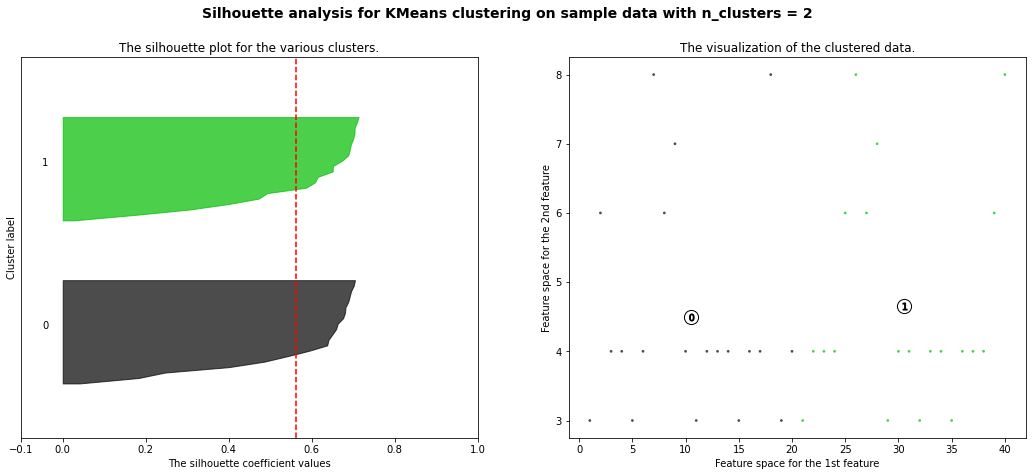

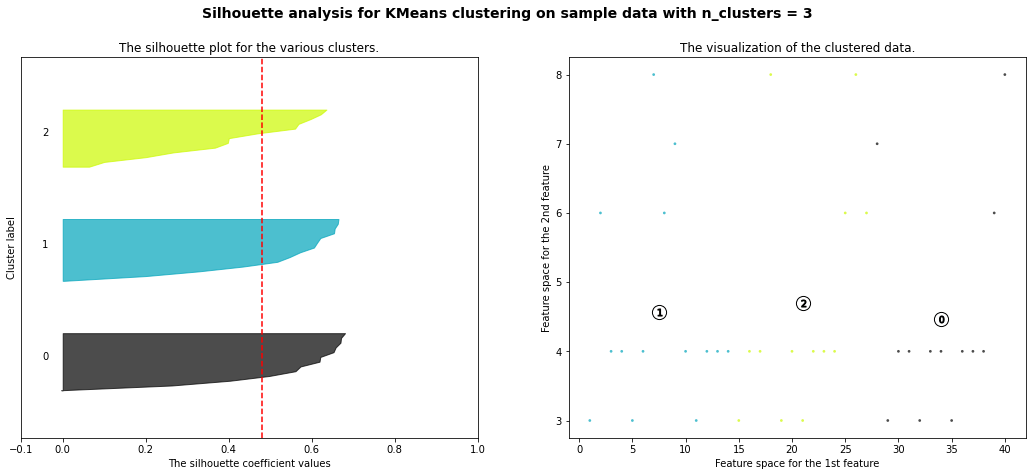

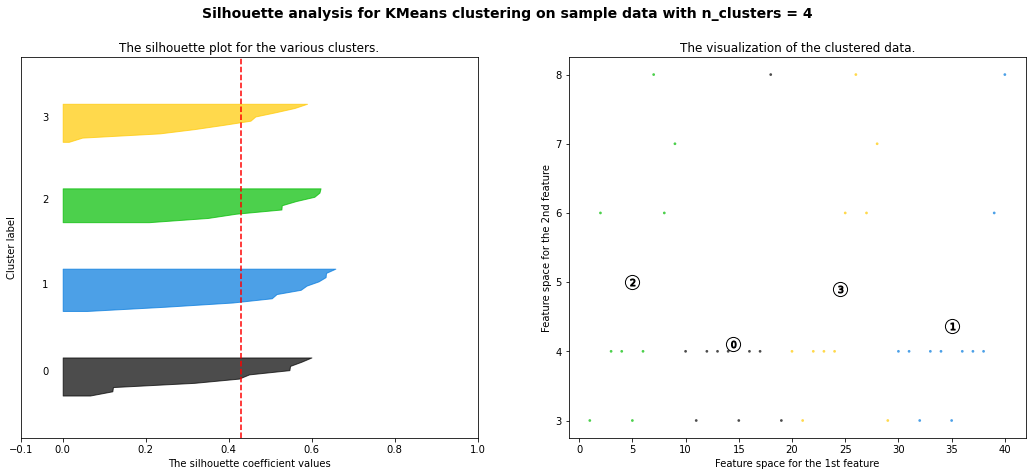

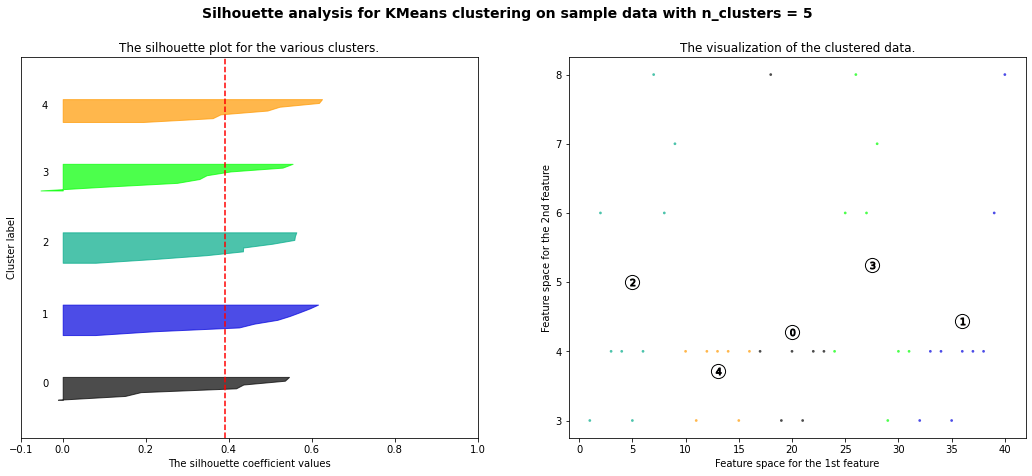

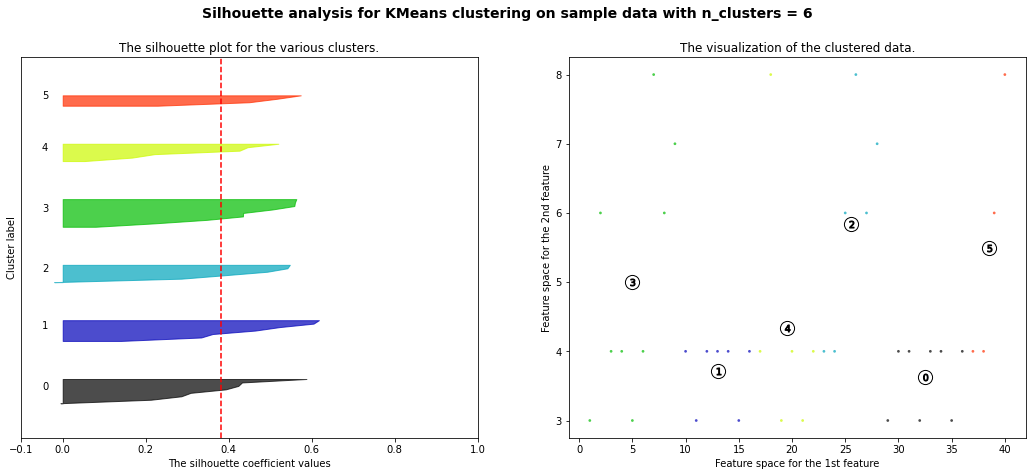

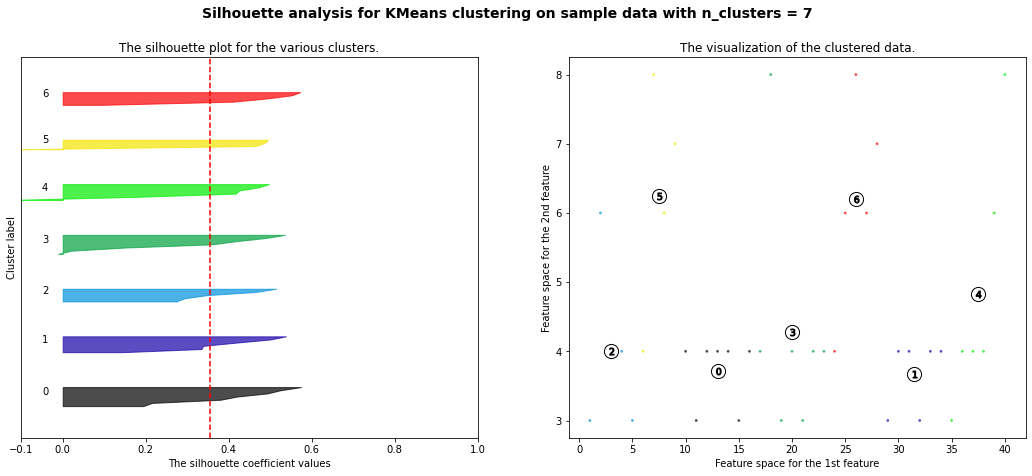

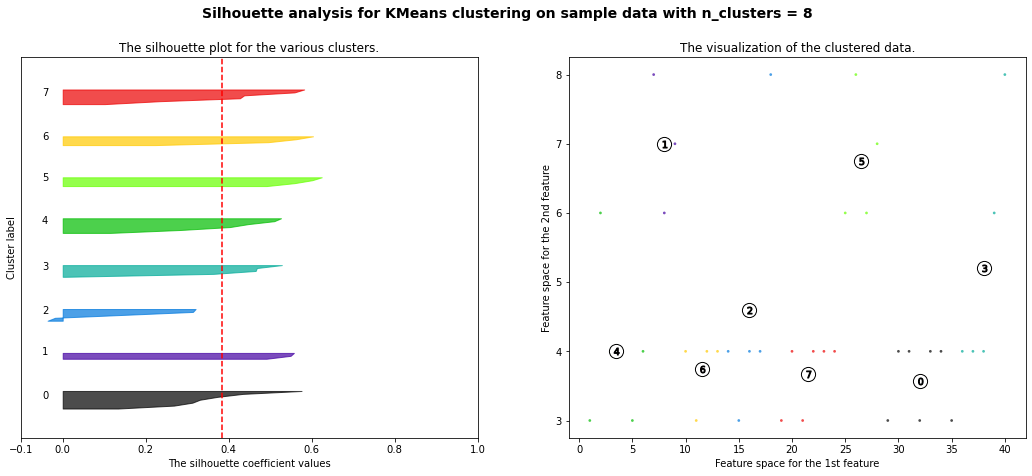

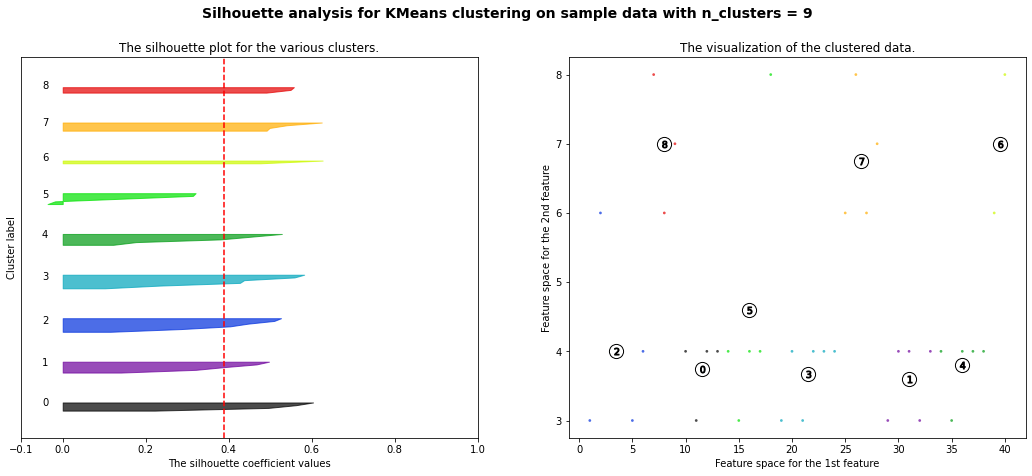

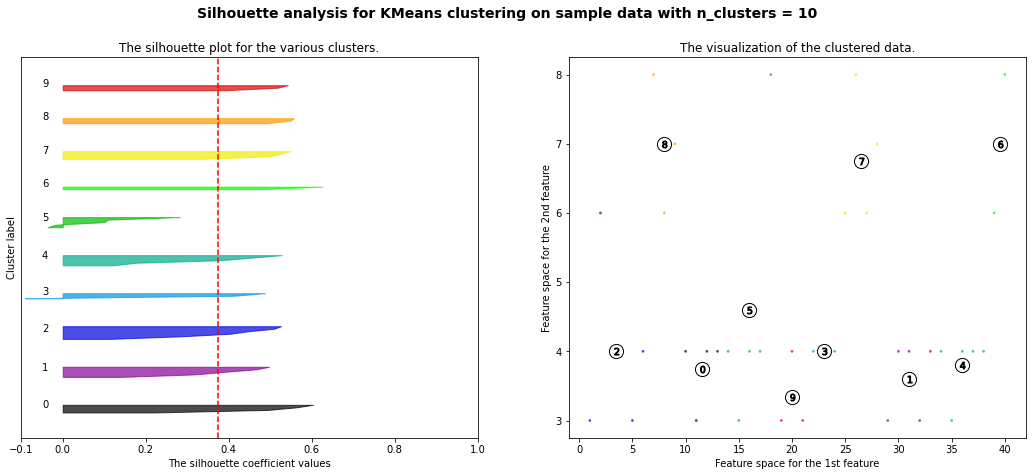

In [112]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
data = data_product.to_numpy()
X = data

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Conclusion: For product data, we get a good silhouette score at a cluster of 3, hence we will select it.

## Algorithms for Car data

### Agglomerative Clustering

In [117]:
data_agglo = data_car

In [118]:
#hc = AgglomerativeClustering(n_clusters=3,affinity="manhattan",linkage="complete")
hc = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

In [119]:
y_hc = hc.fit_predict(data_agglo)
hc.labels_

array([2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 1], dtype=int64)

In [120]:
data_agglo = pd.concat([data_car.iloc[:,:],pd.Series(hc.labels_)],axis=1)
data_agglo = data_agglo.rename(columns={0:"Clusters"})

In [121]:
data1 = data_car

### Kmeans

In [122]:
from sklearn.cluster import KMeans
import numpy as np
X = data_car
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

center = kmeans.cluster_centers_
print(center[2].mean())

2.733333333333333


In [123]:
data_km = pd.concat([data_car.iloc[:,:],pd.Series(kmeans.labels_)],axis=1)
data_km = data_km.rename(columns={0:"Clusters"})

### K medoids

In [124]:
from sklearn_extra.cluster import KMedoids
import numpy as np

X = data_car
data_kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)
data_kmedoids.labels_

array([0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 1, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2], dtype=int64)

In [125]:
data_kmedoids = pd.concat([data_car.iloc[:,:],pd.Series(data_kmedoids.labels_)],axis=1)
data_kmedoids = data_kmedoids.rename(columns={0:"Clusters"})

### Cluster visualisation for all the 3 algorithms

In [127]:
data_agglo.head(50)

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Clusters
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,2
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,0
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,2
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2
5,6,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1,0
6,7,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3,0
7,8,1,1,1,2,1,2,1,4,4,0,2,1,3,2,3,2,1,0
8,9,4,5,3,3,3,3,4,1,1,1,2,4,2,1,3,3,1,0
9,10,1,1,4,4,3,4,4,2,2,0,2,1,2,2,3,3,1,0


In [128]:
data_km.head(50)

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Clusters
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,2
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,0
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,2
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2
5,6,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1,0
6,7,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3,0
7,8,1,1,1,2,1,2,1,4,4,0,2,1,3,2,3,2,1,0
8,9,4,5,3,3,3,3,4,1,1,1,2,4,2,1,3,3,1,2
9,10,1,1,4,4,3,4,4,2,2,0,2,1,2,2,3,3,1,0


In [129]:
data_kmedoids.head(50)

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Clusters
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,0
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,0
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,3
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,0
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,0
5,6,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1,3
6,7,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3,3
7,8,1,1,1,2,1,2,1,4,4,0,2,1,3,2,3,2,1,3
8,9,4,5,3,3,3,3,4,1,1,1,2,4,2,1,3,3,1,0
9,10,1,1,4,4,3,4,4,2,2,0,2,1,2,2,3,3,1,3


#### On assessing results, I feel K means has done best job of making clusters. So let us look at individual cluster and do characterization.

How did i assess results?

I printed all the clusters for all the algorithms and checked which algorithm is giving a cluster with conclusive results. For example K mediod gave clusters of respondents with response of "Strongly agree" as well as "Strongly diagree", while K means  gave cluster of those respondents who choose "Disagree" or "Strongly Disagree", hence more clarity in cluster was seen and the algorithm was choosen.

In [133]:
data_km[data_km["Clusters"]==0]

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Clusters
2,3,1,1,1,2,1,2,1,4,4,0,2,1,3,1,3,1,1,0
5,6,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1,0
6,7,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3,0
7,8,1,1,1,2,1,2,1,4,4,0,2,1,3,2,3,2,1,0
9,10,1,1,4,4,3,4,4,2,2,0,2,1,2,2,3,3,1,0
10,11,2,2,1,2,1,1,1,5,5,1,2,4,2,1,3,1,1,0
12,13,3,3,2,1,1,1,1,5,4,0,3,2,1,2,4,1,3,0


In [134]:
data_km[data_km["Clusters"]==1]

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Clusters
17,18,2,3,2,2,1,1,1,5,4,1,2,3,2,1,3,2,1,1
19,20,4,4,2,1,3,2,1,1,2,0,2,3,3,2,3,3,1,1
20,21,2,2,1,2,1,1,1,5,5,1,2,4,1,1,3,1,1,1
21,22,2,1,5,5,5,5,4,1,1,0,2,2,3,2,3,2,3,1
22,23,4,4,2,2,2,3,4,1,2,1,2,4,3,2,3,3,1,1
23,24,4,5,3,2,3,3,4,1,1,0,1,4,3,1,3,2,1,1
24,25,2,3,2,2,1,1,1,5,4,1,2,4,2,1,3,1,1,1


In [135]:
data_km[data_km["Clusters"]==2]

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Clusters
0,1,5,5,3,2,3,3,4,1,1,1,2,4,2,1,3,3,1,2
1,2,3,3,5,4,4,5,4,1,1,0,2,2,1,2,3,2,1,2
3,4,5,5,4,2,3,4,3,2,2,1,2,4,2,1,3,3,1,2
4,5,2,2,4,5,4,5,4,2,2,0,2,4,3,2,3,2,1,2
8,9,4,5,3,3,3,3,4,1,1,1,2,4,2,1,3,3,1,2


In [136]:
data_km[data_km["Clusters"]==3]

,Resp.Id,Indian Technlogy high order,Buy Made in India,Value for money,Convenience over style,Don't do waste full expenditure,No compromise on safety,Saver not spender,Try new things,Be part of a changing world,Purchase Intentions,Occupation,Family income,Family size,Marital Status,Education,Age,Nature of Job,Clusters
11,12,5,4,3,2,3,2,2,2,2,0,1,2,3,2,3,3,3,3
13,14,5,5,2,2,2,3,1,1,1,1,2,3,2,1,3,2,1,3
14,15,3,2,5,5,5,5,4,2,1,0,2,1,3,2,3,3,2,3
15,16,4,5,2,2,3,1,1,1,1,1,2,3,2,1,3,3,1,3
16,17,2,1,5,5,5,4,5,1,1,0,3,2,2,2,3,2,1,3
18,19,4,5,3,3,3,2,2,1,1,1,2,3,2,1,3,3,1,3


###### Chracterisation

Cluster 1: People have "Disagreement" as their choice in first columns. Mostly these people have purchase intentions as "No" and work in "Private sector/Self employed" with majority being "Single", having family "size of 1-2" and family income "less than 1 lakh". Their education is "Graduation" and belong to "21-30 years" age group doing "Desk job"

Cluster 2: People have "Disagreement/Neutral" as their choice in first columns. Mostly these people have purchase intentions as "Mixed" and work in "Private sector" with majority being "Married", having family "size of 1-5" and family income "1.6-2 lakh". Their education is "Graduation" and belong to "31-40 years" age group doing "Desk job"

Cluster 3: People have "Agreement" as their choice in first columns. Mostly these people have purchase intentions as "Yes" and work in "Private sector" with majority being "Married/Single", having family "size of 3-5" and family income "Grtearer than 2 lakh". Their education is "Graduation" and belong to "21-40 years" age group doing "Desk job"

Cluster 4: People have "Mostly Agreement/Neutral" as their choice in first columns. Mostly these people have purchase intentions as "Mixed" and work in "Private sector/Government" with majority being "Married", having family "size of 3+" and family income "1-2 lakh". Their education is "Graduation" and belong to "41+ years" age group doing "Desk job/Travelling"

## Algorithms for Product data

### Agglomerative Clustering

In [137]:
data_agglo1 = data_product

In [138]:
hc1 = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_hc1 = hc1.fit_predict(data_agglo1)
hc1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [139]:
data_agglo1 = pd.concat([data_product.iloc[:,:],pd.Series(hc1.labels_)],axis=1)
data_agglo1 = data_agglo1.rename(columns={0:"Clusters"})

### Kmeans

In [140]:
data1 = data_product

In [141]:
from sklearn.cluster import KMeans
import numpy as np
X = data_product
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

center = kmeans.cluster_centers_
print(center[2].mean())

3.378205128205128


In [142]:
data_km1 = pd.concat([data_product.iloc[:,:],pd.Series(kmeans.labels_)],axis=1)
data_km1 = data_km1.rename(columns={0:"Clusters"})

### K medoid

In [143]:
from sklearn_extra.cluster import KMedoids
import numpy as np

X = data_product
data_kmedoids1 = KMedoids(n_clusters=3, random_state=0).fit(X)
data_kmedoids1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [144]:
data_kmedoids1 = pd.concat([data_product.iloc[:,:],pd.Series(data_kmedoids1.labels_)],axis=1)
data_kmedoids1 = data_kmedoids1.rename(columns={0:"Clusters"})

## Cluster visualisation for all the 3 algorithms

In [153]:
data_km1.head(50)

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan,Clusters
0,1,3,1,0,1,1,0,0,0,0,1,0,0,1
1,2,6,0,2,0,0,1,0,1,0,0,1,0,1
2,3,4,1,1,0,0,0,0,0,1,1,0,1,1
3,4,4,0,2,1,1,0,0,0,0,1,0,0,1
4,5,3,1,0,1,1,0,0,0,0,1,0,1,1
5,6,4,0,2,0,0,0,0,0,1,1,0,1,1
6,7,8,0,3,0,0,1,1,1,0,0,1,0,1
7,8,6,0,1,0,0,1,0,1,0,0,1,0,1
8,9,7,0,2,0,0,0,1,1,0,0,1,0,1
9,10,4,2,0,1,1,0,0,0,0,1,0,0,1


In [154]:
data_agglo1.head(50)

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan,Clusters
0,1,3,1,0,1,1,0,0,0,0,1,0,0,0
1,2,6,0,2,0,0,1,0,1,0,0,1,0,0
2,3,4,1,1,0,0,0,0,0,1,1,0,1,0
3,4,4,0,2,1,1,0,0,0,0,1,0,0,0
4,5,3,1,0,1,1,0,0,0,0,1,0,1,0
5,6,4,0,2,0,0,0,0,0,1,1,0,1,0
6,7,8,0,3,0,0,1,1,1,0,0,1,0,0
7,8,6,0,1,0,0,1,0,1,0,0,1,0,0
8,9,7,0,2,0,0,0,1,1,0,0,1,0,0
9,10,4,2,0,1,1,0,0,0,0,1,0,0,0


In [155]:
data_kmedoids1.head(50)

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan,Clusters
0,1,3,1,0,1,1,0,0,0,0,1,0,0,0
1,2,6,0,2,0,0,1,0,1,0,0,1,0,0
2,3,4,1,1,0,0,0,0,0,1,1,0,1,0
3,4,4,0,2,1,1,0,0,0,0,1,0,0,0
4,5,3,1,0,1,1,0,0,0,0,1,0,1,0
5,6,4,0,2,0,0,0,0,0,1,1,0,1,0
6,7,8,0,3,0,0,1,1,1,0,0,1,0,0
7,8,6,0,1,0,0,1,0,1,0,0,1,0,0
8,9,7,0,2,0,0,0,1,1,0,0,1,0,0
9,10,4,2,0,1,1,0,0,0,0,1,0,0,0


We will go with K mediod algorithm(based on explanation given above).

This algorithm did a fairly good job as compared to other two.

In [152]:
data_kmedoids1[data_kmedoids1["Clusters"]==0]

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan,Clusters
0,1,3,1,0,1,1,0,0,0,0,1,0,0,0
1,2,6,0,2,0,0,1,0,1,0,0,1,0,0
2,3,4,1,1,0,0,0,0,0,1,1,0,1,0
3,4,4,0,2,1,1,0,0,0,0,1,0,0,0
4,5,3,1,0,1,1,0,0,0,0,1,0,1,0
5,6,4,0,2,0,0,0,0,0,1,1,0,1,0
6,7,8,0,3,0,0,1,1,1,0,0,1,0,0
7,8,6,0,1,0,0,1,0,1,0,0,1,0,0
8,9,7,0,2,0,0,0,1,1,0,0,1,0,0
9,10,4,2,0,1,1,0,0,0,0,1,0,0,0


In [156]:
data_kmedoids1[data_kmedoids1["Clusters"]==1]

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan,Clusters
13,14,4,0,2,0,0,0,0,0,1,1,0,1,1
14,15,3,1,0,1,1,0,0,0,0,1,0,0,1
15,16,4,1,1,0,0,0,0,0,1,1,0,1,1
16,17,4,0,2,1,1,0,0,0,0,1,0,0,1
17,18,8,0,3,0,0,1,1,1,0,0,1,0,1
18,19,3,1,0,1,1,0,0,0,0,1,0,1,1
19,20,4,2,0,1,1,0,0,0,0,1,0,0,1
20,21,3,1,0,1,1,0,0,0,0,1,0,0,1
21,22,4,2,0,1,1,0,0,0,1,1,0,1,1
22,23,4,1,1,0,0,0,0,0,1,1,0,1,1


In [157]:
data_kmedoids1[data_kmedoids1["Clusters"]==2]

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan,Clusters
26,27,6,0,1,0,0,1,0,1,0,0,1,0,2
27,28,7,0,2,0,0,0,1,1,0,0,1,0,2
28,29,3,1,0,1,1,0,0,0,0,1,0,0,2
29,30,4,1,1,0,0,0,0,0,1,1,0,1,2
30,31,4,0,2,1,1,0,0,0,0,1,0,0,2
31,32,3,1,0,1,1,0,0,0,0,1,0,1,2
32,33,4,0,2,0,0,0,0,0,1,1,0,1,2
33,34,4,2,0,1,1,0,0,0,0,1,0,0,2
34,35,3,1,0,1,1,0,0,0,0,1,0,0,2
35,36,4,2,0,1,1,0,0,0,1,1,0,1,2


###### Chracterisation

Cluster 1: Family "size of 4-7", majority having "0 children below 18" and "2-3 children above 18". The products having 1 are the ones these families are liekly to buy.

Cluster 2:  Family "size of 4-8", majority having "1-2 children below 18" and "1-2 children above 18". The products having 1 are the ones these families are liekly to buy.

Cluster 3: Family "size of 3-4", majority having "1 children below 18" and "2 children above 18". The products having 1 are the ones these families are liekly to buy.

## Question 2:  Apriori Algorithm and Rule mining

### Plan:
- Clean the data(Replace Nan, replace Yes/no, convert values >1 to 1, drop irrelevant columnms)
- Apply apriori algorithm
- Apply associative rules
- Make rules and get the best outcomes

In [77]:
from sklearn.preprocessing import OrdinalEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [78]:
data_rule = pd.read_excel("Data for arules 1.xls")
code_numeric = {'yes': 1, 'no': 0}
data_rule = data_rule.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
data_rule.head()

,resid,familysz,chb18,cha18,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan
0,1,3,1,0,1,1,0,0,0,0,1,0,0
1,2,6,0,2,0,0,1,0,1,0,0,1,0
2,3,4,1,1,0,0,0,0,0,1,1,0,1
3,4,4,0,2,1,1,0,0,0,0,1,0,0
4,5,3,1,0,1,1,0,0,0,0,1,0,1


In [79]:
rule1 = pd.DataFrame(data_rule)
rule1.drop(["resid","familysz","chb18","cha18"],axis=1,inplace=True)
rule1.head()

,borvita,milo,zandu,dred,dblue,prtnex,holik,badya,complan
0,1,1,0,0,0,0,1,0,0
1,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,1,1,0,1
3,1,1,0,0,0,0,1,0,0
4,1,1,0,0,0,0,1,0,1


In [81]:
apr_rule1 = apriori(rule1,min_support=0.3,use_colnames=True)
apr_rule1

,support,itemsets
0,0.450,(borvita)
1,0.450,(milo)
2,0.350,(prtnex)
3,0.725,(holik)
4,0.425,(complan)
5,0.450,"(borvita, milo)"
6,0.450,"(borvita, holik)"
7,0.450,"(holik, milo)"
8,0.350,"(prtnex, holik)"
9,0.350,"(prtnex, complan)"


In [82]:
new_param = association_rules(apr_rule1,metric="confidence",min_threshold=0.3)
new_param

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(borvita),(milo),0.450,0.450,0.450,1.000000,2.222222,0.247500,inf
1,(milo),(borvita),0.450,0.450,0.450,1.000000,2.222222,0.247500,inf
2,(borvita),(holik),0.450,0.725,0.450,1.000000,1.379310,0.123750,inf
3,(holik),(borvita),0.725,0.450,0.450,0.620690,1.379310,0.123750,1.450000
4,(holik),(milo),0.725,0.450,0.450,0.620690,1.379310,0.123750,1.450000
5,(milo),(holik),0.450,0.725,0.450,1.000000,1.379310,0.123750,inf
6,(prtnex),(holik),0.350,0.725,0.350,1.000000,1.379310,0.096250,inf
7,(holik),(prtnex),0.725,0.350,0.350,0.482759,1.379310,0.096250,1.256667
8,(prtnex),(complan),0.350,0.425,0.350,1.000000,2.352941,0.201250,inf
9,(complan),(prtnex),0.425,0.350,0.350,0.823529,2.352941,0.201250,3.683333


In [100]:
new_param[(new_param["lift"]>2) & (new_param["confidence"]>=0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(borvita),(milo),0.450,0.450,0.45,1.000000,2.222222,0.24750,inf
1,(milo),(borvita),0.450,0.450,0.45,1.000000,2.222222,0.24750,inf
8,(prtnex),(complan),0.350,0.425,0.35,1.000000,2.352941,0.20125,inf
9,(complan),(prtnex),0.425,0.350,0.35,0.823529,2.352941,0.20125,3.683333
12,"(borvita, holik)",(milo),0.450,0.450,0.45,1.000000,2.222222,0.24750,inf
14,"(holik, milo)",(borvita),0.450,0.450,0.45,1.000000,2.222222,0.24750,inf
15,(borvita),"(holik, milo)",0.450,0.450,0.45,1.000000,2.222222,0.24750,inf
17,(milo),"(borvita, holik)",0.450,0.450,0.45,1.000000,2.222222,0.24750,inf
19,"(prtnex, holik)",(complan),0.350,0.425,0.35,1.000000,2.352941,0.20125,inf
20,"(complan, holik)",(prtnex),0.425,0.350,0.35,0.823529,2.352941,0.20125,3.683333


##### Hence we get to know the possible products that the consumer will buy after purchasing a certain product.

# Rule 2 data

In [92]:
data_rule2 = pd.read_csv("Data for arules 2.csv")
data_rule2.head()

,Row Labels,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,6468572,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,6486475,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,6504964,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,6529569,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,6549521,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
data_rule2 = data_rule2.drop(["Row Labels"],axis=1)
data_rule2 = data_rule2.replace([2,3,4],1)

In [94]:
data_rule2 = data_rule2.fillna(0)

In [95]:
data_rule2.head()

,Almonds,Poha,Banana,Beans,Besan,Boiled Rice,Bread,Brinjals,Buns & Pavs,Cakes,...,Sooji & Rava,Soya Products,Sugar,Sugar Cubes,Sunflower Oils,Toor Dal,Urad Dal,Utensil Scrub Pads,Washing Bars,Whole Spices
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
apr_rule2 = apriori(data_rule2,min_support=0.3,use_colnames=True)
apr_rule2

,support,itemsets
0,0.72,(Banana)
1,0.48,(Beans)
2,0.40,(Boiled Rice)
3,0.42,(Namkeen)
4,0.50,(Other Dals)
5,0.40,(Other Rice Products)
6,0.38,(Other Vegetables)
7,0.30,(Raisins)
8,0.44,(Root Vegetables)
9,0.40,(Snacky Nuts)


In [97]:
rule2 = association_rules(apr_rule2,metric="confidence",min_threshold=0.3)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Banana),(Beans),0.72,0.48,0.38,0.527778,1.099537,0.0344,1.101176
1,(Beans),(Banana),0.48,0.72,0.38,0.791667,1.099537,0.0344,1.344000
2,(Boiled Rice),(Banana),0.40,0.72,0.30,0.750000,1.041667,0.0120,1.120000
3,(Banana),(Boiled Rice),0.72,0.40,0.30,0.416667,1.041667,0.0120,1.028571
4,(Banana),(Namkeen),0.72,0.42,0.38,0.527778,1.256614,0.0776,1.228235
5,(Namkeen),(Banana),0.42,0.72,0.38,0.904762,1.256614,0.0776,2.940000
6,(Banana),(Other Dals),0.72,0.50,0.36,0.500000,1.000000,0.0000,1.000000
7,(Other Dals),(Banana),0.50,0.72,0.36,0.720000,1.000000,0.0000,1.000000
8,(Banana),(Other Vegetables),0.72,0.38,0.32,0.444444,1.169591,0.0464,1.116000
9,(Other Vegetables),(Banana),0.38,0.72,0.32,0.842105,1.169591,0.0464,1.773333


##### Let us apply rules and get the products the consumer will buy

In [102]:
rule2[(rule2["lift"]>1) & (rule2["confidence"]>0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Namkeen),(Banana),0.42,0.72,0.38,0.904762,1.256614,0.0776,2.940000
9,(Other Vegetables),(Banana),0.38,0.72,0.32,0.842105,1.169591,0.0464,1.773333
11,(Root Vegetables),(Banana),0.44,0.72,0.40,0.909091,1.262626,0.0832,3.080000
13,(Snacky Nuts),(Banana),0.40,0.72,0.36,0.900000,1.250000,0.0720,2.800000
20,(Other Vegetables),(Beans),0.38,0.48,0.32,0.842105,1.754386,0.1376,3.293333
33,(Urad Dal),(Other Dals),0.36,0.50,0.30,0.833333,1.666667,0.1200,3.000000
37,(Urad Dal),(Sugar),0.36,0.50,0.34,0.944444,1.888889,0.1600,9.000000
40,"(Beans, Root Vegetables)",(Banana),0.34,0.72,0.30,0.882353,1.225490,0.0552,2.380000
